In [5]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as opt

#data encoding

#x : expiratory flow (ml/s)
#y : expiratory NO concentration (ppb) 

x = np.array([4.2, 8.5, 10.3, 17.2, 20.7, 38.2 , 75.6, 850 , 1550])
y1 =  np.array([83.3, 53.3 , 44.8 , 32.6 , 28.1 , 19.5 , 11.5, 5.7 , 5.3])
y2 = np.array([125.2 , 71.3 , 68.0 , 45.9 , 40.3 , 21.8 , 16.1, 7.4 , 5.6])
y3 =  np.array([171.0, 107.2, 94.3 , 62.0 , 54.9 , 34.0 , 22.5, 5.3 , 4.0])
y4 =  np.array([143.7, 81.8 , 70.8 , 51.2 , 48.3 , 27.0 , 17.2,4.6 , 3.9])
y5 =  np.array([92.4, 69.8 , 60.1 , 46.6 , 43.1 , 26.1 , 16.7, 6.6 , 6.2])
y6 =  np.array([108.5, 46.9, 53.8 , 35.6 , 29.4 , 18.6 , 13.0 , 6.3, 3.9])
y7 =  np.array([56.3, 41.4, 36.1, 29.8, 23.3, 15.8, 10.6, 5.4, 4.0])
y8 =  np.array([27.5, 22.0, 19.8, 16.7, 14.1, 9.2, 5.3, 4.4, 4.0])
y9 =  np.array([101.6, 63.4, 52.4, 36.1, 33.4, 19.4, 11.4, 5.7, 6.6])
y10 =  np.array([215.9, 176.7, 150.8, 106.9, 99.8, 57.9, 32.8, 8.3, 7.6])

y = np.zeros((10, 9))

y[0]  = y1
y[1] = y2
y[2]  = y3
y[3] = y4
y[4]  = y5
y[5] = y6
y[6]  = y7
y[7] = y8
y[8]  = y9
y[9] = y10

print('expiratory flow (ml/s)')
print(x)
print('expiratory NO concentration (ppb)')
print(y)

expiratory flow (ml/s)
[   4.2    8.5   10.3   17.2   20.7   38.2   75.6  850.  1550. ]
expiratory NO concentration (ppb)
[[ 83.3  53.3  44.8  32.6  28.1  19.5  11.5   5.7   5.3]
 [125.2  71.3  68.   45.9  40.3  21.8  16.1   7.4   5.6]
 [171.  107.2  94.3  62.   54.9  34.   22.5   5.3   4. ]
 [143.7  81.8  70.8  51.2  48.3  27.   17.2   4.6   3.9]
 [ 92.4  69.8  60.1  46.6  43.1  26.1  16.7   6.6   6.2]
 [108.5  46.9  53.8  35.6  29.4  18.6  13.    6.3   3.9]
 [ 56.3  41.4  36.1  29.8  23.3  15.8  10.6   5.4   4. ]
 [ 27.5  22.   19.8  16.7  14.1   9.2   5.3   4.4   4. ]
 [101.6  63.4  52.4  36.1  33.4  19.4  11.4   5.7   6.6]
 [215.9 176.7 150.8 106.9  99.8  57.9  32.8   8.3   7.6]]


1   CALV = 5.4 DNO = 4.1 ; CW = 129.9 ; χ² = 0.62
2   CALV = 6.2 DNO = 3.2 ; CW = 226.1 ; χ² = 4.82
3   CALV = 5.1 DNO = 4.5 ; CW = 257.8 ; χ² = 1.9
4   CALV = 5.7 DNO = 3.1 ; CW = 267.0 ; χ² = 8.97
5   CALV = 5.9 DNO = 9.1 ; CW = 102.8 ; χ² = 1.78
6   CALV = 6.7 DNO = 0.2 ; CW = 2685.3 ; χ² = 18.17
7   CALV = 4.4 DNO = 8.2 ; CW = 64.5 ; χ² = 1.1
8   CALV = 3.4 DNO = 10.6 ; CW = 29.6 ; χ² = 0.56
9   CALV = 5.2 DNO = 3.4 ; CW = 179.4 ; χ² = 1.19
10   CALV = 4.2 DNO = 10.6 ; CW = 236.8 ; χ² = 10.86


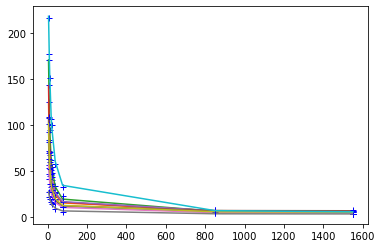

In [6]:
#NON-LINEAR REGRESSION

#INIT 

nbpts = x.shape[0] # numbers of points
A0 = (5,15,5000)# random inital parameters of the model

# *************
# * Fonctions *
# *************

CALV_list = []
DNO_list = []
Cw_list = []

def model(A, x):
    return (A[1] * (( 1 - np.exp((-A[0])/x))) + (A[2] * np.exp((-A[0])/x))) #model of the article
        
def error_(A, x, y):
    return y - model(A, x) #error between any y value and the model


for z in range (y.shape[0]) : 
    

    resultat = opt.least_squares(error_, A0, args=(x, y[z])) #non linear regression

    Aopt = resultat.x # parameters at the optimum
    aopt = Aopt[0]
    bopt = Aopt[1]
    copt = Aopt[2]
    erreur = 2*resultat.cost/nbpts #error
    
    
    DNO_list.append(aopt) #fill in list with all parameters of each subject
    Cw_list.append(bopt)
    CALV_list.append(copt)

    #display 
    
    
    plt.plot(x, y[z], "b+") #scatter plot
    plt.plot(x, model((aopt, bopt, copt), x)) #regression line

    print(z+1, " ", "CALV =", copt.round(1),"DNO =", aopt.round(1), "; CW =", bopt.round(1), 
          "; χ² =", erreur.round(2))
    

In [7]:
#REMOVE element 6 because there is no convergence

CALV_list.pop(5)
Cw_list.pop(5)
DNO_list.pop(5)


0.1607837576405777

In [8]:
#calculate geometric mean 

from scipy.stats.mstats import gmean


print("CALV geometric MEAN", gmean(CALV_list))
print("CW geometric MEAN",gmean(Cw_list))
print("DNO geometric MEAN",gmean(DNO_list))

print('')
#Rounded values
print("Rounded CALV geometric MEAN", gmean(CALV_list).round(2))
print("Rounded CW geometric MEAN",gmean(Cw_list).round(2))
print("Rounded DNO geometric MEAN",gmean(DNO_list).round(2))


CALV geometric MEAN 4.977418679469171
CW geometric MEAN 136.86445646126927
DNO geometric MEAN 5.585843427164049

Rounded CALV geometric MEAN 4.98
Rounded CW geometric MEAN 136.86
Rounded DNO geometric MEAN 5.59
